# Unitarity

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mySqrt(z):
    return 1j*np.sqrt(-z)

# relative momentum in the CM frame
def q(s):                      
    return mySqrt(s-4)/2

# two-body phase space function in the case of identical particles
def rho(s):                     
    return q(s)/(8*np.pi*np.sqrt(s)*2) 

# K matrix in the effective range representation
def K_eff_range(s, a, r):
    return q(s)/(rho(s)*(-(1/a)+((r*q(s)**2)/2)))

# Gamma function of the Breit-Wigner representation
def Gamma(s, m0, g0):
    return g0**2*m0**2*q(s)/(6*np.pi*s)

# K matrix in the Breit-Wigner representation
def K_breit_wigner(s, m0, g0):
    return np.sqrt(s)*Gamma(s, m0, g0)/((m0**2-s)*rho(s))

# Amplitude for a given K matrix
def amplitude(s, Kmatrix):
    K = Kmatrix(s)
    return K/(1-1j*rho(s)*K)

Let us redo some of the previous plots just to check that our definitions are good.

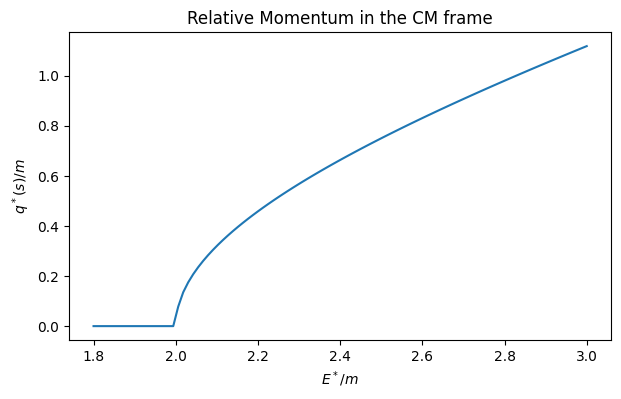

In [3]:
# energy range we have been asked to explore in these exercises
E = np.linspace(1.8, 3, 100) 
# small number we will use to avoid the cut of the square root
eps = 1e-16 

# relative momentum plot
fig, ax = plt.subplots(figsize = (7,4))
ax.plot(E, np.real(q(E**2+1j*eps)))
ax.set_xlabel(r'$E^*/m$')
ax.set_ylabel(r'$q^*(s)/m$')
ax.set_title(r'Relative Momentum in the CM frame')
plt.show(fig)

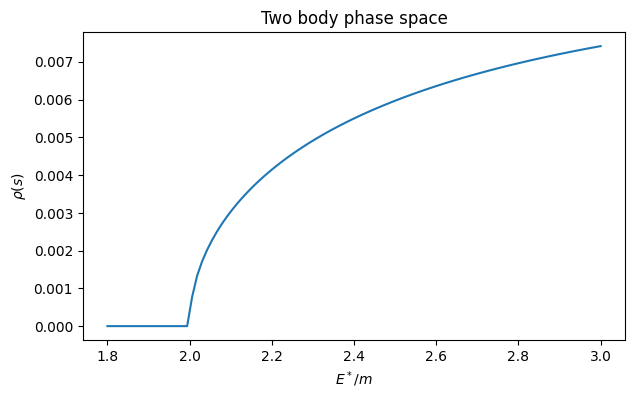

In [4]:
# phase space function plot

fig, ax = plt.subplots(figsize = (7,4))
ax.plot(E, np.real(rho(E**2+1j*eps)))
ax.set_xlabel(r'$E^*/m$')
ax.set_ylabel(r'$\rho(s)$')
ax.set_title(r'Two body phase space')
plt.show(fig)

Text(0, 0.5, '$\\mathcal{M}$')

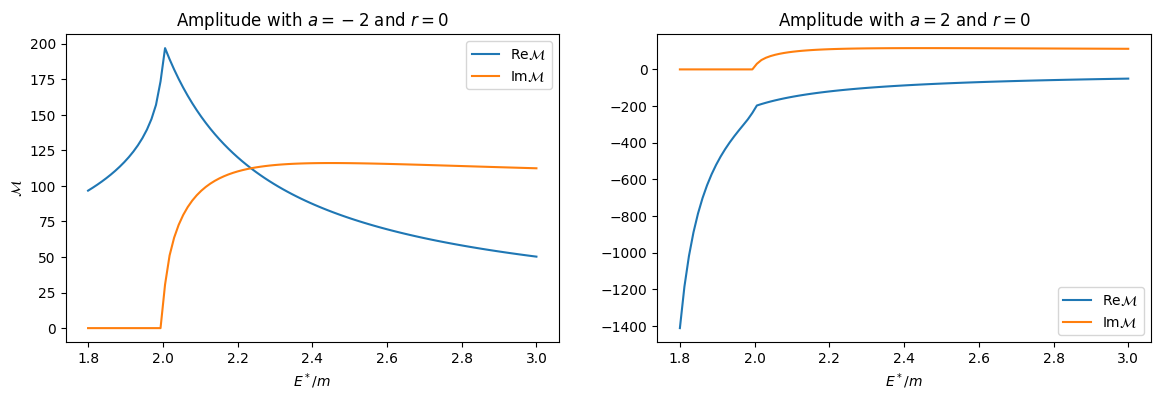

In [5]:
# plots for the effective range parametrization

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
for i in range (0, 2):
    ax[i].plot(E, np.real(amplitude(E**2 + 1j*eps, lambda s: K_eff_range(s, a[i], r[i]))), label = r'Re$\mathcal{M}$')
    ax[i].plot(E, np.imag(amplitude(E**2 + 1j*eps, lambda s: K_eff_range(s, a[i], r[i]))), label = r'Im$\mathcal{M}$')
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'Amplitude with $a={}$ and $r={}$'.format(a[i], r[i]))  
    ax[i].legend()
    
ax[0].set_ylabel(r'$\mathcal{M}$')

Text(0, 0.5, '$\\mathcal{M}$')

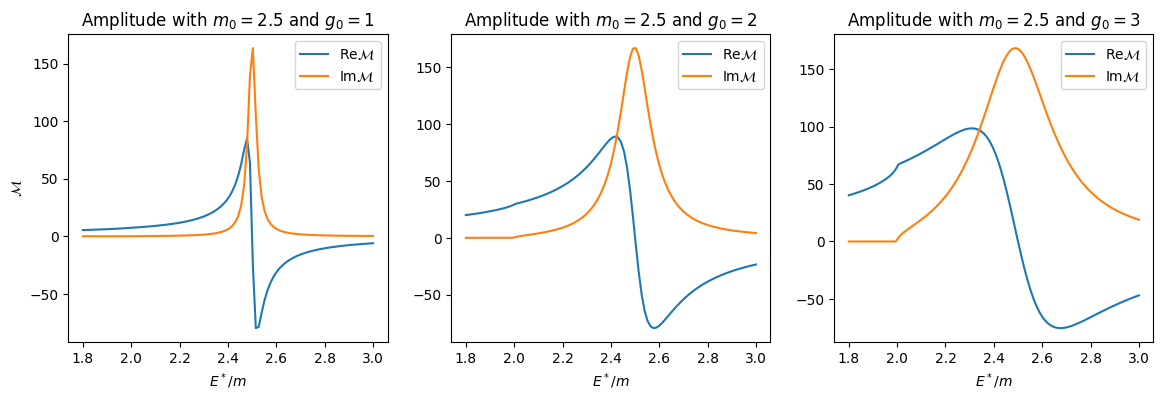

In [6]:
# plots for the Breit-Wigner parametrization

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
for i in range (0, 3):
    ax[i].plot(E, np.real(amplitude(E**2 + 1j*eps, lambda s: K_breit_wigner(s, m0[i], g0[i]))), label = r'Re$\mathcal{M}$')
    ax[i].plot(E, np.imag(amplitude(E**2 + 1j*eps, lambda s: K_breit_wigner(s, m0[i], g0[i]))), label = r'Im$\mathcal{M}$')
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'Amplitude with $m_0={}$ and $g_0={}$'.format(m0[i], g0[i]))  
    ax[i].legend()
    
ax[0].set_ylabel(r'$\mathcal{M}$')

Text(0.5, 0.92, 'Im$\\mathcal{M}$')

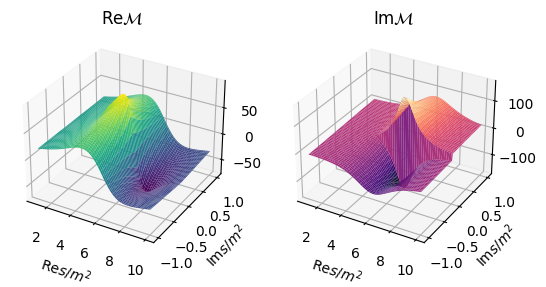

In [7]:
# Example of amplitude plot in the complex plane

X, Y = np.meshgrid(np.linspace(1, 10, 100), np.linspace(-1, 1, 100))
Z = X + 1j*Y

fig, ax = plt.subplots(nrows = 1, ncols = 2, subplot_kw ={'projection' : '3d'})
ax[0].plot_surface(X, Y, np.real(amplitude(Z, lambda s: K_breit_wigner(s, m0[2], g0[2]))), cmap = 'viridis')
ax[1].plot_surface(X, Y, np.imag(amplitude(Z, lambda s: K_breit_wigner(s, m0[2], g0[2]))), cmap = 'magma')
ax[0].set_xlabel(r'Re$s/m^2$')
ax[0].set_ylabel(r'Im$s/m^2$')
ax[1].set_xlabel(r'Re$s/m^2$')
ax[1].set_ylabel(r'Im$s/m^2$')
ax[0].set_title(r'Re$\mathcal{M}$')
ax[1].set_title(r'Im$\mathcal{M}$')

This is the result obtained in the example file but it heavily depends on which square roots are rotated and which aren't. It seem like the correct thing to do is to rotate the square root in the $q^*$ but not anywhere else.

## 3

Text(0.5, 0.98, 'Amplitudes for $m_0=2.5$ and $g_0=3$')

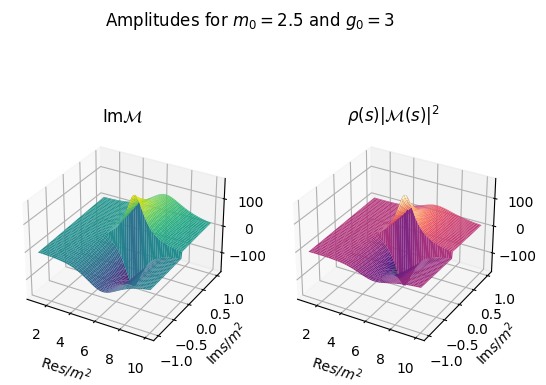

In [18]:
X, Y = np.meshgrid(np.linspace(1, 10, 100), np.linspace (-1, 1, 100))
Z = X + 1j*Y

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, subplot_kw = {"projection" : "3d"})
amplitudes = amplitude(Z, lambda s: K_breit_wigner(s, m0[2], g0[2]))
ax1.plot_surface(X, Y, np.imag(amplitudes), cmap = "viridis")
ax2.plot_surface(X, Y, rho(Z)*np.abs(amplitudes)**2, cmap = "magma")
ax1.set_xlabel(r"Re$s/m^2$")
ax2.set_xlabel(r"Re$s/m^2$")
ax1.set_ylabel(r"Im$s/m^2$")
ax2.set_ylabel(r"Im$s/m^2$")
ax1.set_title(r"Im$\mathcal{M}$")
ax2.set_title(r"$\rho(s)|\mathcal{M}(s)|^2$")
fig.suptitle(r"Amplitudes for $m_0={}m$ and $g_0={}$".format(m0[2],g0[2]))

## 4

Text(0, 0.5, '$|\\rho(s)\\mathcal{M}(s)|$')

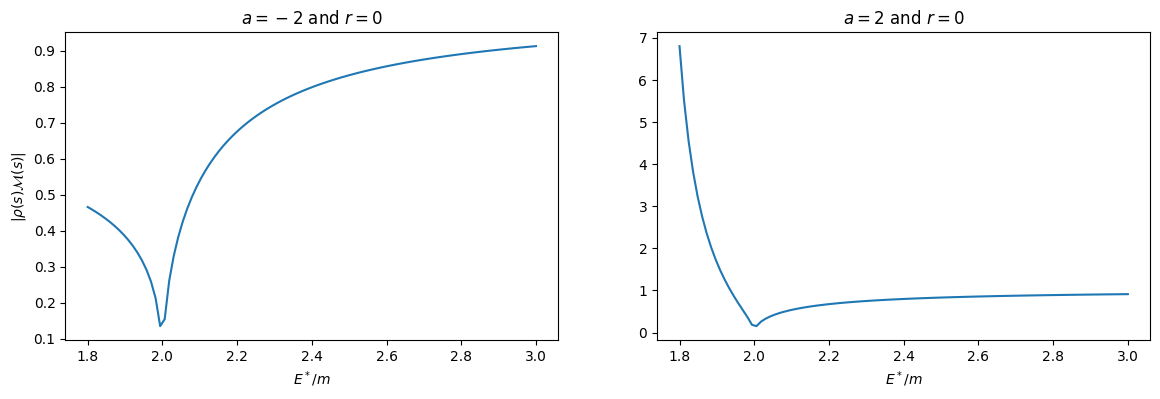

In [34]:
# plots for the effective range parametrization

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
s = E**2 + 1j*eps
for i in range (0, 2):
    ax[i].plot(E, np.abs(rho(s)*amplitude(s, lambda s: K_eff_range(s, a[i], r[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$a={}$ and $r={}$'.format(a[i], r[i]))  
    
ax[0].set_ylabel(r'$|\rho(s)\mathcal{M}(s)|$')

Text(0, 0.5, '$|\\rho(s)\\mathcal{M}(s)|$')

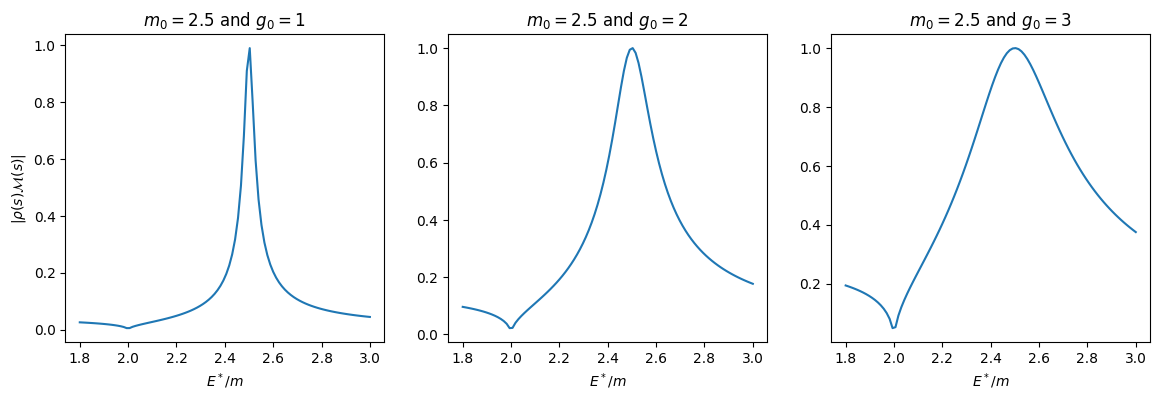

In [35]:
# plots for the Breit-Wigner parametrization

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
s = E**2 + 1j*eps
for i in range (0, 3):
    ax[i].plot(E, np.abs(rho(s)*amplitude(s, lambda s: K_breit_wigner(s, m0[i], g0[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$m_0={}$ and $g_0={}$'.format(m0[i], g0[i]))  
    
ax[0].set_ylabel(r'$|\rho(s)\mathcal{M}(s)|$')

# Magnitudes and Phases

## 2

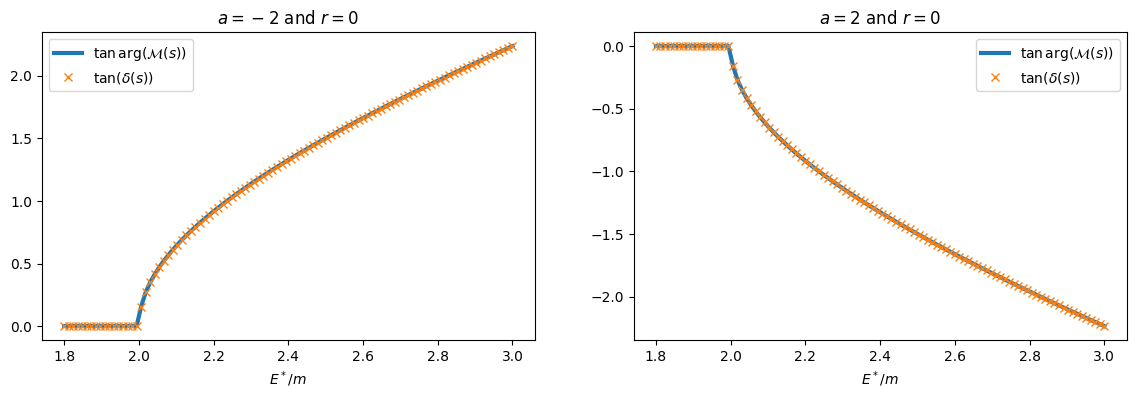

In [103]:
# plots for the effective range parametrization

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
s = E**2 + 1j*eps
for i in range (0, 2):
    ax[i].plot(E, np.tan(np.angle(amplitude(s, lambda s: K_eff_range(s, a[i], r[i])))), linewidth = 3, label = r"$\tan\arg(\mathcal{M}(s))$")
    ax[i].plot(E, (1/((((r[i]*q(s)**2)/2)-(1/a[i]))/q(s))), marker = "x", linewidth = 0, label = r"$\tan(\delta(s))$")
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$a={}$ and $r={}$'.format(a[i], r[i]))  
    ax[i].legend()

One needs to be careful to use $\tan$ instead of $\cot$ for the comparision. Indeed, as we saw, below threshhold the phase is real, making $\cot$ explode. Alternatively we can compare the angles directly. This may however produce diferences by multiples of $2\pi$. 

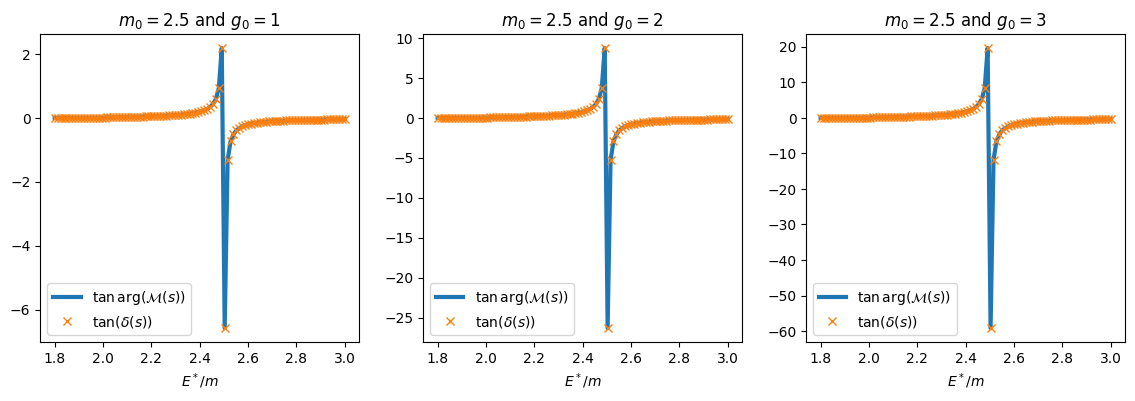

In [104]:
# plots for the Breit-Wigner parametrization

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
for i in range (0, 3):
    ax[i].plot(E, np.tan(np.angle(amplitude(s, lambda s: K_breit_wigner(s, m0[i], g0[i])))), linewidth = 3, label = r"$\tan\arg(\mathcal{M}(s))$")
    ax[i].plot(E, np.sqrt(s)*Gamma(s, m0[i], g0[i])/(m0[i]**2-s), marker = "x", linewidth = 0, label = r"$\tan(\delta(s))$")
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$m_0={}$ and $g_0={}$'.format(m0[i], g0[i])) 
    ax[i].legend(loc = "lower left")

## 3

Text(0, 0.5, '$|\\mathcal{M}(s)|$')

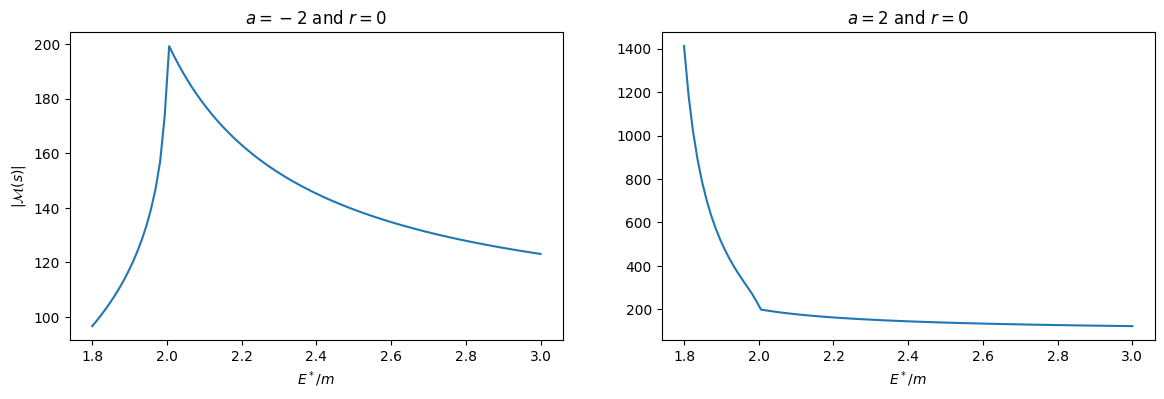

In [111]:
# magnitudes

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
for i in range (0, 2):
    ax[i].plot(E, np.abs(amplitude(s, lambda s: K_eff_range(s, a[i], r[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$a={}$ and $r={}$'.format(a[i], r[i]))  
    
ax[0].set_ylabel(r"$|\mathcal{M}(s)|$")

Text(0, 0.5, '$\\arg\\mathcal{M}(s)$')

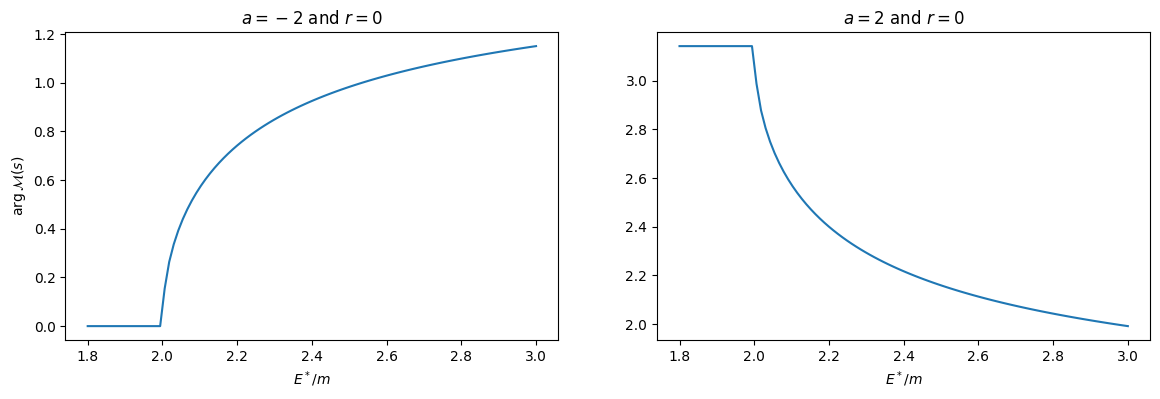

In [121]:
# angles

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
for i in range (0, 2):
    ax[i].plot(E, np.angle(amplitude(s, lambda s: K_eff_range(s, a[i], r[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$a={}$ and $r={}$'.format(a[i], r[i]))  
    
ax[0].set_ylabel(r"$\arg\mathcal{M}(s)$")

## 4

Text(0, 0.5, '$|\\mathcal{M}(s)|$')

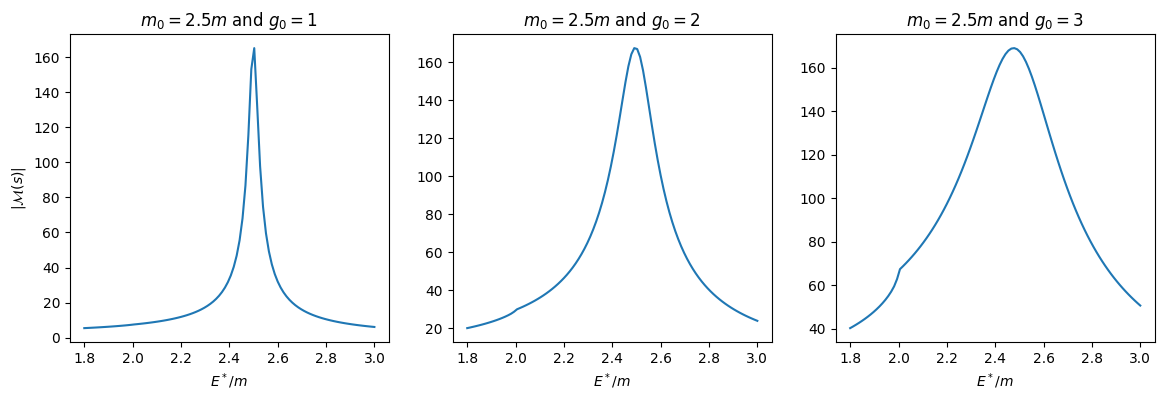

In [119]:
# magnitudes

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
for i in range (0, 3):
    ax[i].plot(E, np.abs(amplitude(s, lambda s: K_breit_wigner(s, m0[i], g0[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$m_0={}m$ and $g_0={}$'.format(m0[i], g0[i])) 
    
ax[0].set_ylabel(r"$|\mathcal{M}(s)|$")

Text(0, 0.5, '$\\arg\\mathcal{M}(s)$')

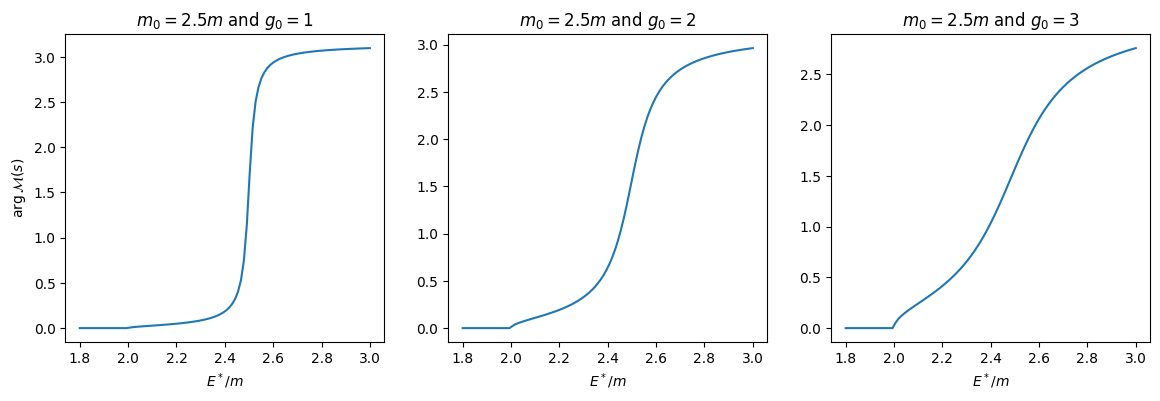

In [122]:
# angles

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
for i in range (0, 3):
    ax[i].plot(E, np.angle(amplitude(s, lambda s: K_breit_wigner(s, m0[i], g0[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$m_0={}m$ and $g_0={}$'.format(m0[i], g0[i])) 
    
ax[0].set_ylabel(r"$\arg\mathcal{M}(s)$")